In [1]:
from coco_pano_ext_demo import COCO, COCO_plot, precision_recall_maps
import coco_pano_ext_demo as coco
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave

In [2]:
white = 255 * 256 ** 2 + 255 * 256 ** 1 + 255

def rgbtolabel(rgb_img):
    rgb_img_2d = rgb_img[..., 0] * (256 ** 2) + rgb_img[..., 1] * 256 + rgb_img[..., 2] * 1
    index, img_label  = np.unique(rgb_img_2d, return_inverse=True)

    index_white = list(index).index(white)

    # Set white (background) to 0
    img_label = np.where(img_label == index_white, -1, img_label)
    img_label = np.where(img_label == 0, index_white, img_label)
    img_label = np.where(img_label == -1, 0, img_label)

    img_label = img_label.reshape(rgb_img.shape[:2])
    
    return img_label

def show_precision_recall(GT, Pred, t=0.5):
    precision, recall = precision_recall_maps(GT, Pred, lower_bound=t)

    # imsave("pre.png", precision)
    # imsave("rec.png", recall)

    f, [ax1, ax2] = plt.subplots(1, 2, figsize=(30,20))
    ax1.imshow(precision)
    ax1.set_title("Precision")
    ax2.imshow(recall)
    ax2.set_title("Recall")

def compute_coco(P, T):
    PQ, SQ, RQ, score_table = COCO(P, T, ignore_zero=True, output_scores=True)
    print(
        f"""
        The Panoptic Quality is: {PQ}
        The Segmentation Quality is: {SQ}
        The Recognition Quality is: {RQ}
        """
        )
    COCO_plot(score_table)

def display_coco_all(P, T):
    compute_coco(P, T)
    show_precision_recall(T, P)


In [3]:
T = rgbtolabel(imread("gt_mota_0028.png"))


        The Panoptic Quality is: 1.0
        The Segmentation Quality is: 1.0
        The Recognition Quality is: 1.0
        


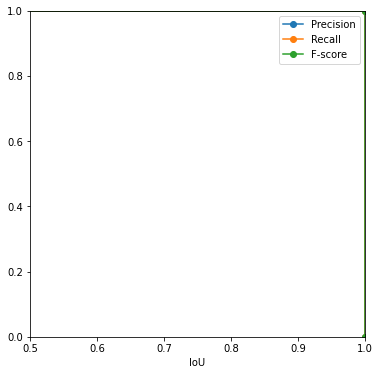

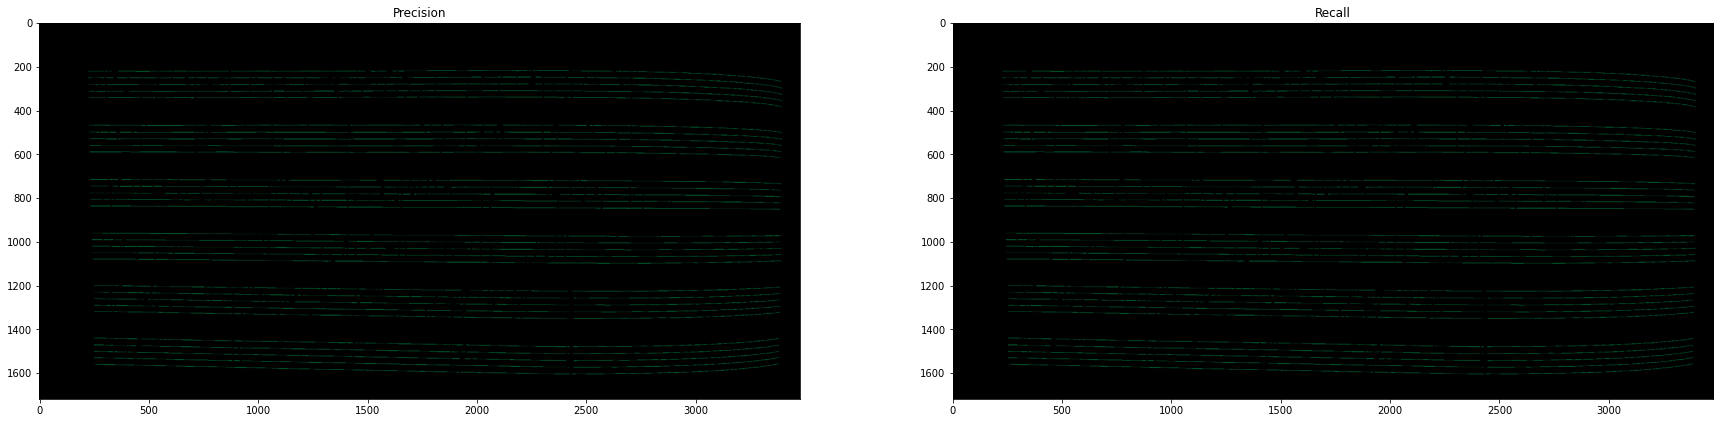

In [4]:
P = T.copy()
display_coco_all(P, T)


        The Panoptic Quality is: 0.4845400014648412
        The Segmentation Quality is: 0.9470554574085532
        The Recognition Quality is: 0.5116279069767442
        


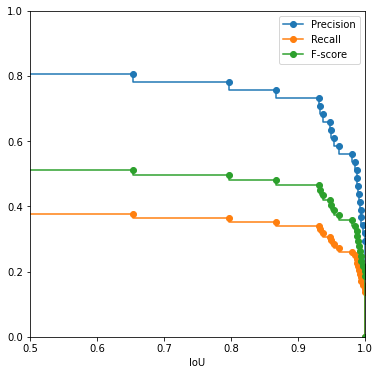

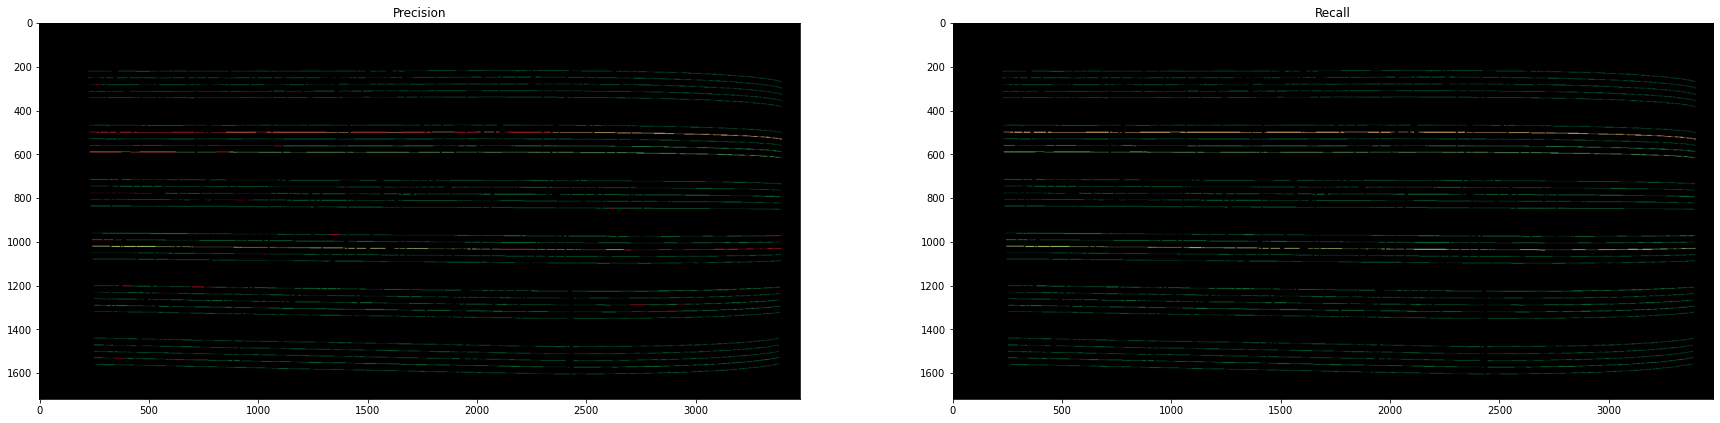

In [5]:
P = rgbtolabel(imread("gt_mota_0028_ori.png"))
display_coco_all(P, T)


        The Panoptic Quality is: 0.621853038751753
        The Segmentation Quality is: 0.9016869061900418
        The Recognition Quality is: 0.6896551724137931
        


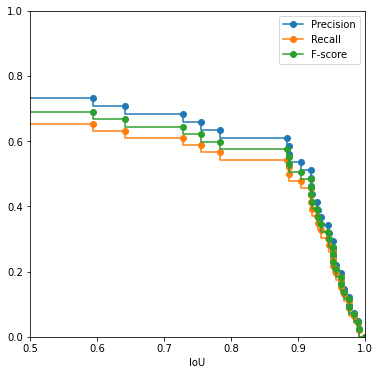

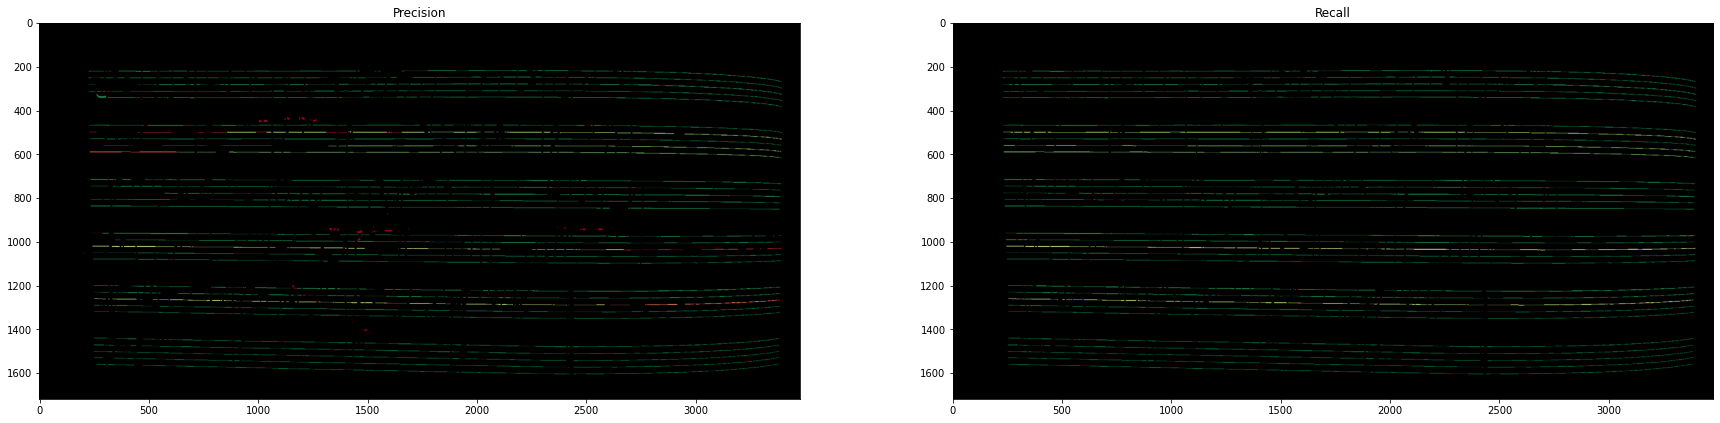

In [6]:
P = rgbtolabel(imread("te_ml300_disc50_0028.png"))
display_coco_all(P, T)